<a href="https://colab.research.google.com/github/AngleKit/HomeworkPython/blob/main/Day3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3: Fourier-Transform Infrared Spectroscopy
MSE 7530, Fall 2025, Wayne State University  
Monday, September 8th, 2025  
Prof. Camille Bishop  

We will start today's lecture finishing up the plotting and querying of the NIST WebBook that we started last week. As the spectra we loaded and plotted were FTIR spectra, this will be a natural lead-in to our next topic.

## Part 0.5: Quick refresher and necessary import cells
Every notebook will generally start with all the necessary import cells in one place; here I will import all packages that we used at once.

In [1]:
# the standard cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# our "special" packages for handling the NIST data
! pip install nistchempy
! pip install jcamp
import nistchempy as nist
import jcamp as jc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jcamp to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for jcamp: filename=jcamp-1.2.2-py2.py3-none-any.whl size=10652 sha256=00ee202a75e57d2d6fe2d7d77d306842005ab612737d3cf13b13b5ba7adff9da
  Stored in directory: /root/.cache/pip/wheels/6a/d1/9f/9599e61ea4096b380977b3e343d144d1705615c3608f9c034d
Successfully built jcamp


Setting up file access to the class GH Repo and your personal Google Drive

In [3]:
!git clone https://github.com/cbishop4/MSE7530.git
from google.colab import drive
drive.mount('/content/drive')

Cloning into 'MSE7530'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 97 (delta 33), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (97/97), 6.24 MiB | 7.72 MiB/s, done.
Resolving deltas: 100% (33/33), done.


MessageError: Error: credential propagation was unsuccessful

The cell that follows can be run if you need to re-load the Class Repo. If you need to run it, you can just 'un-comment' the lines by taking out the number sign at the beginning. Lines that begin with the number sign # are not run and are called comments. Often they will be included in a notebook if the author wants you to have the option to run that code, but automatically executing it would cause issues.

In [ ]:
# !rm -rf /content/MSE7530/
# !git clone https://github.com/cbishop4/MSE7530.git

## Part 1: Loading, Plotting, and Comparing IR spectra

### Loading the IR spectra for hexane & answering some questions as done last week

In [8]:
search_results = nist.run_search(identifier = 'hexane', search_type = 'name')
X = search_results.compounds[0]
X.get_ir_spectra() # retrieves the IR spectrum for the compound in question

In [9]:
# the code I found has you save the files before you can use the jdx reader;
# there is probably a slicker way to do this that doesn't require saving and reading files.
output_dir = 'nist_spectra'
os.makedirs(output_dir, exist_ok=True)
# Save the mass spectra to the directory
X.save_ir_spectra(output_dir)

In [10]:
spec1 = jc.jcamp_readfile('/content/nist_spectra/C110543_IR_0.jdx')
spec2 = jc.jcamp_readfile('/content/nist_spectra/C110543_IR_1.jdx')
spec3 = jc.jcamp_readfile('/content/nist_spectra/C110543_IR_2.jdx')

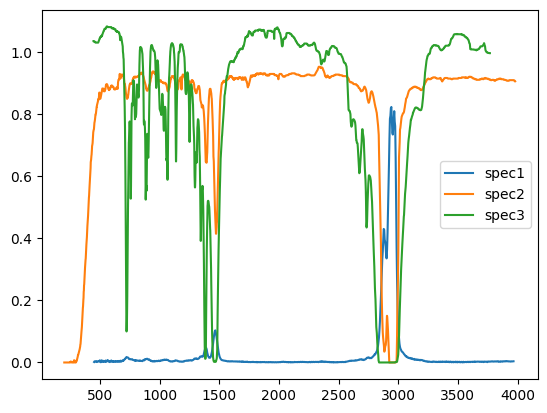

In [11]:
fig, ax = plt.subplots()
ax.plot(spec1['x'],spec1['y'],label='spec1')
ax.plot(spec2['x'],spec2['y'],label='spec2')
ax.plot(spec3['x'],spec3['y'],label='spec3')
ax.legend()

<font color='red'> Metadata discussion - how did you look through the metadata? What differences did you find in the metadata for each spectra that gives you hints about what was different between each?

Text(0, 0.5, 'Intensity (a.u., adjusted)')

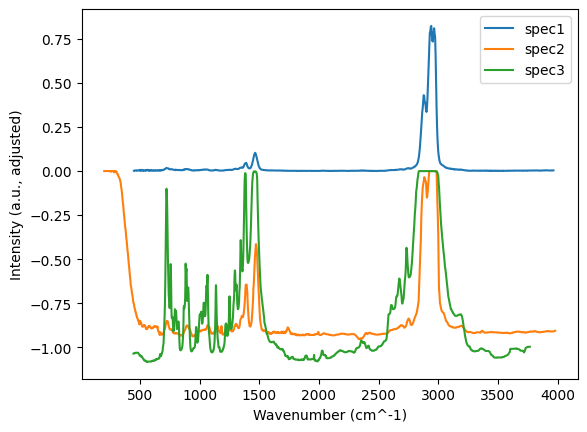

In [12]:
fig, ax = plt.subplots()
ax.plot(spec1['x'],spec1['y'],label='spec1')
ax.plot(spec2['x'],spec2['y']*-1,label='spec2')
ax.plot(spec3['x'],spec3['y']*-1,label='spec3')
ax.legend()
ax.set_xlabel('Wavenumber (cm^-1)')
ax.set_ylabel('Intensity (a.u., adjusted)')

Task: <font color='red'> Play around with the scale factors on the y data to make a more presentable graph (above).

Instead you can use the equation for absorbance to trasmittenmaces
[A = log10(1/T)]^


Option: plotting on two sets of axes for the similar and different spectra

[]

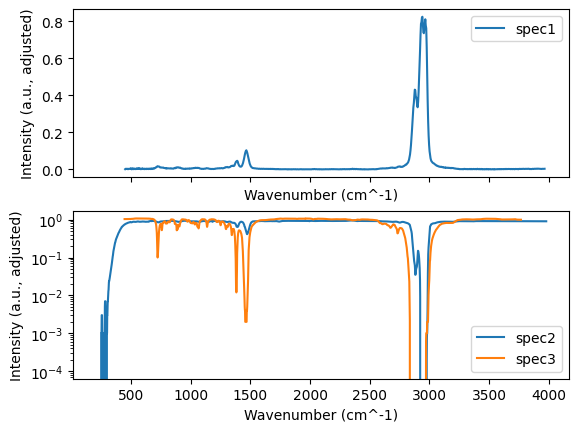

In [13]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(spec1['x'],spec1['y'],label='spec1')
ax[1].plot(spec2['x'],spec2['y'],label='spec2')
ax[1].plot(spec3['x'],spec3['y'],label='spec3')
for a in ax:
  a.legend()
  a.set_xlabel('Wavenumber (cm^-1)')
  a.set_ylabel('Intensity (a.u., adjusted)')
ax[1].semilogy()

<font color='red'> Discuss the above graphs. Log scaling? Absorbance? Transmission?

### <font color='red'>Compare hexane and cyclohexane (leftover activity from last week)

In [22]:
search_results1 = nist.run_search(identifier = 'hexane', search_type = 'name')
X = search_results1.compounds[0]

X.get_ir_spectra() # retrieves the IR spectrum for the compound in question

search_r = nist.run_search(identifier = 'cyclohexane', search_type = 'name')
XX = search_r.compounds[0]

XX.get_ir_spectra() # retrieves the IR spectrum for the compound in question
XX.ir_specs

[Spectrum(C110827, IR spectrum #0),
 Spectrum(C110827, IR spectrum #1),
 Spectrum(C110827, IR spectrum #2),
 Spectrum(C110827, IR spectrum #3)]

In [23]:
! pip install jcamp
import jcamp as jc


In [ ]:
import os

# Create a directory to save the spectra
output_dir = 'nist_spectra'
os.makedirs(output_dir, exist_ok=True)

# Save the mass spectra to the directory
X.save_ir_spectra(output_dir)

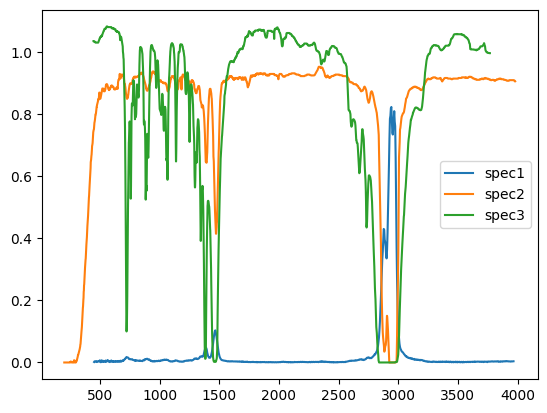

In [28]:
fig, ax = plt.subplots()
ax.plot(spec1['x'],spec1['y'],label='spec1')
ax.plot(spec2['x'],spec2['y'],label='spec2')
ax.plot(spec3['x'],spec3['y'],label='spec3')
ax.legend()

## Python Skill 1 : Reading .csv files

Data is often stored and shared as csv (comma separated value) files. You may also encounter files with different **delimiters**. A delimiter is what breaks up distinct entries. Some common delimiters besides commas are space (' ') or tab ('\t').
Pandas is the package which we use to read .csv files and turn them into **dataframes**. Dataframes are tables, somewhat analogous to excel files, that hold data. While this is new for me, Colab has extra functonalities that pop up when you have a dataframe.
This is a more finicky file than you will encounter in the first homework assignment.

In [ ]:
# if it does not work, you might need to review the file

In [24]:
import pandas as pd # this is quite often done at the beginning of a notebook, because it is used so frequently

In [5]:
loaded_csv = pd.read_csv('/content/MSE7530/sampledata/Dynamic_1_D10_enthalpy_2kmin.csv', encoding='unicode_escape') # meant to get an error

ParserError: Error tokenizing data. C error: Expected 1 fields in line 24, saw 2


Here, our issue is that the data file has a bunch of information at the top. In the class github, download the file and open it in excel. What does it look like?

In [6]:
loaded_csv = pd.read_csv('/content/MSE7530/sampledata/Dynamic_1_D10_enthalpy_2kmin.csv', encoding='unicode_escape',header=38),#header=40)

In [7]:
loaded_csv

(      ##Temp./C;Time/min;DSC/(mW/mg);Sensit./(uV/mW);Segment
 0            25.05900;  0.00000; 1.377704e-002;3.63056;1     
 1            25.05800;  0.00500; 1.357991e-002;3.63056;1     
 2            25.05800;  0.01000; 1.345951e-002;3.63056;1     
 3            25.05700;  0.01500; 1.338277e-002;3.63056;1     
 4            25.05800;  0.02000; 1.333912e-002;3.63056;1     
 ...                                                  ...     
 69264       279.62701;314.18500;-3.855636e-002;3.10250;6     
 69265       279.62601;314.18833;-4.124603e-002;3.10251;6     
 69266       279.62601;314.19167;-4.380748e-002;3.10251;6     
 69267       279.62601;314.19500;-4.626651e-002;3.10251;6     
 69268       279.62701;314.19917;-4.744466e-002;3.10250;6     
 
 [69269 rows x 1 columns],)

We still have a problem here; it didn't make a dataframe. When you inspect, it looks like the file is actually delimited by semicolons. To fix this, we can explicitly specify the delimiter when we call read_csv

In [25]:
loaded_csv = pd.read_csv('/content/MSE7530/sampledata/Dynamic_1_D10_enthalpy_2kmin.csv', encoding='unicode_escape',header=38,delimiter=';'),#header=40)

In [26]:
loaded_csv

(       ##Temp./C   Time/min  DSC/(mW/mg)  Sensit./(uV/mW)  Segment
 0        25.05900    0.00000     0.013777          3.63056        1
 1        25.05800    0.00500     0.013580          3.63056        1
 2        25.05800    0.01000     0.013460          3.63056        1
 3        25.05700    0.01500     0.013383          3.63056        1
 4        25.05800    0.02000     0.013339          3.63056        1
 ...           ...        ...          ...              ...      ...
 69264   279.62701  314.18500    -0.038556          3.10250        6
 69265   279.62601  314.18833    -0.041246          3.10251        6
 69266   279.62601  314.19167    -0.043807          3.10251        6
 69267   279.62601  314.19500    -0.046267          3.10251        6
 69268   279.62701  314.19917    -0.047445          3.10250        6
 
 [69269 rows x 5 columns],)

In [27]:
loaded_csv[0]

,##Temp./C,Time/min,DSC/(mW/mg),Sensit./(uV/mW),Segment
0,25.05900,0.00000,0.013777,3.63056,1
1,25.05800,0.00500,0.013580,3.63056,1
2,25.05800,0.01000,0.013460,3.63056,1
3,25.05700,0.01500,0.013383,3.63056,1
4,25.05800,0.02000,0.013339,3.63056,1
...,...,...,...,...,...
69264,279.62701,314.18500,-0.038556,3.10250,6
69265,279.62601,314.18833,-0.041246,3.10251,6
69266,279.62601,314.19167,-0.043807,3.10251,6
69267,279.62601,314.19500,-0.046267,3.10251,6


We now have a dataframe. <font color='red'>Plot the column "DSC" vs the "temp" column.</font>

In [ ]:
plt.plot(loaded_csv[0]['##Temp./C'], loaded_csv[0]['DSC/(mW/mg)'],'o',markersize=1)

## Python Skill 2: User-defined Functions

You can make a user-defined function to solve any equation. It can have as many inputs and as many outputs as you want. Here is a simple equation to find the volume of a sphere, given its radius:

In [29]:
def sphere_volume(radius):
  vol = (4/3)*np.pi*radius**3
  return vol

We can then call the function using its name

In [30]:
Vsph_2 = sphere_volume(2)
print(f'The volume of the sphere with radius of 2 is {Vsph_2}')

The volume of the sphere with radius of 2 is 33.510321638291124


<font color='red'>  Write a function to calculate the wavelength of a photon of a given energy, and use it to answer the question: A typical synchrotron X-ray scattering experiment uses X-rays with energy = 10 keV. What is the X-ray wavelength in nm?

Scientific reminders:  
$E = h\nu$  
$\nu = \frac{c}{\lambda}$  
$h = 6.626 \times 10^{-34} J \cdotp s$  
$c = 3.0 \times 10^{8} m/s$  
$1 eV = 1.602 \times 10^{-19} J$

In [44]:
# your code here ## answer is 0.124
def wavelength_Calcuator(Energy):
  #constant
  h = 6.626*(10**(-34))
  c = 3.0*(10**8)
  eV = 1.602*(10**(-19))
  #equation
  v = Energy/h
  wavelength = (c / v / eV)*10**6

  return wavelength


In [46]:
wavelength_Calcuator(10)

0.1240823970037453

We can also use a function to calculate a range of volumes at once. For example, let's take a range of sphere radii. We use the


```
np.linspace(start, stop, numvalues)
```
function to generate a numpy array of evenly spaced numbers quickly. For future reference, there is also a
```
np.logspace()
```
function, which generates a numpy array of values that are evenly spaced on a log scale.


In [ ]:
radii = np.linspace(1,10,10) # generates an array from 1 to 10 with 10 values
print(radii)

In [ ]:
volumes = sphere_volume(radii)
plt.plot(radii,volumes,'o')
plt.xlabel('Radius (nm)')
plt.ylabel('Volume ($nm^{3}$)')

<font color='red'>Now, do the same for a range of X-ray energies from 100 eV to 10 keV. What do you notice about the plot? Is there a better way to scale it?

In [ ]:
# your code here

#### <font color='blue'>The most important concepts from above:
1) A user-defined function can be used to automatically calculate quantities, avoiding large repeated blocks of code  
2) An array of values can be passed to a function to output an array of corresponding return values, enabling quick plotting of trends

## Part 2: Fourier Transform Infrared Spectroscopy

Return to the class powerpoint/board for theoretical background.

###  <font color='red'> Exercise:  Calculate the intensity I as a function of $\delta$ (retardation, or difference in path length) for light with $\lambda$ = $2 \mu m$. Take the value $I_{0}$ to be arbitrarily equal to 1. </font>
Note that the cosine function is part of numpy and <font color='blue'> takes inputs and outputs in radians.</font> There are a couple functions you can use to convert between the two. (You may or may not have to do this in this particular case; check if the cosine term is in radians or degrees)

```
np.cos(x) # input and output in radians
np.rad2deg(x) # converts an angle x in radians to degrees
np.radians(x) # converts an angle x in degrees to radians
np.pi # no arguments or parentheses for this; it is just a constant
```
Alternatively to using the function, you can just use the conversion where $\pi~ radians = 180°$.


Guide to the correct steps:  
1) Write a user-defined function that converts $\delta$ and $\lambda$ to Intensity.  
2) Define an evenly spaced numpy array of values of $\delta$ (I recommend values from -20 to 20 $\mu m$.    
3) Use your function to calculate the range of intensities expected.
4) Plot your intensities on the y-axis vs. $\delta$ on the x-axis.

In [ ]:
# your code here (add extra cells if necessary)

<font color='red'> Does this look like the interferogram in the example slides? Why or why not?

### Making the interferogram for many wavelengths (I have written this code because it requires a few new concepts at once)

In [ ]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum:
  interferogram += I_delta(deltas,wl)

In [ ]:
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\delta$ ($\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Does this look like the interferogram in the example slides? Why or why not?

### <font color='blue'>Preview: Next class we will use/simulate interferograms for real experimental data, and interconvert between the spectra you see in, e.g., the NIST database, and the corresponding interferograms.

<font color='blue'>Recommended preparation: Go through this notebook and work on conceptually understanding the exercises we have done so far in the FTIR section, and connecting them to the equations in the powerpoint. The walkthrough will be guided, so you will be able to follow along with limited knowledge, but it will be more valuable if you can connect it to the theoretical material we learned today.